In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [7]:
boston=pd.read_csv("C:\Min\개인공부\BDA 6기\데이터\Boston_house.csv")

In [8]:
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


In [9]:
# 데이터 분포, 상관계수 확인
# ols 확인
# 다중공선성 확인
# ols 확인
# 해당변수 스케일링 진행
# 변수 최적 찾아보기

#다중회귀 (y값에 대한 여러가지 컬럼) boston 데이터

In [10]:
bst_features=boston.columns

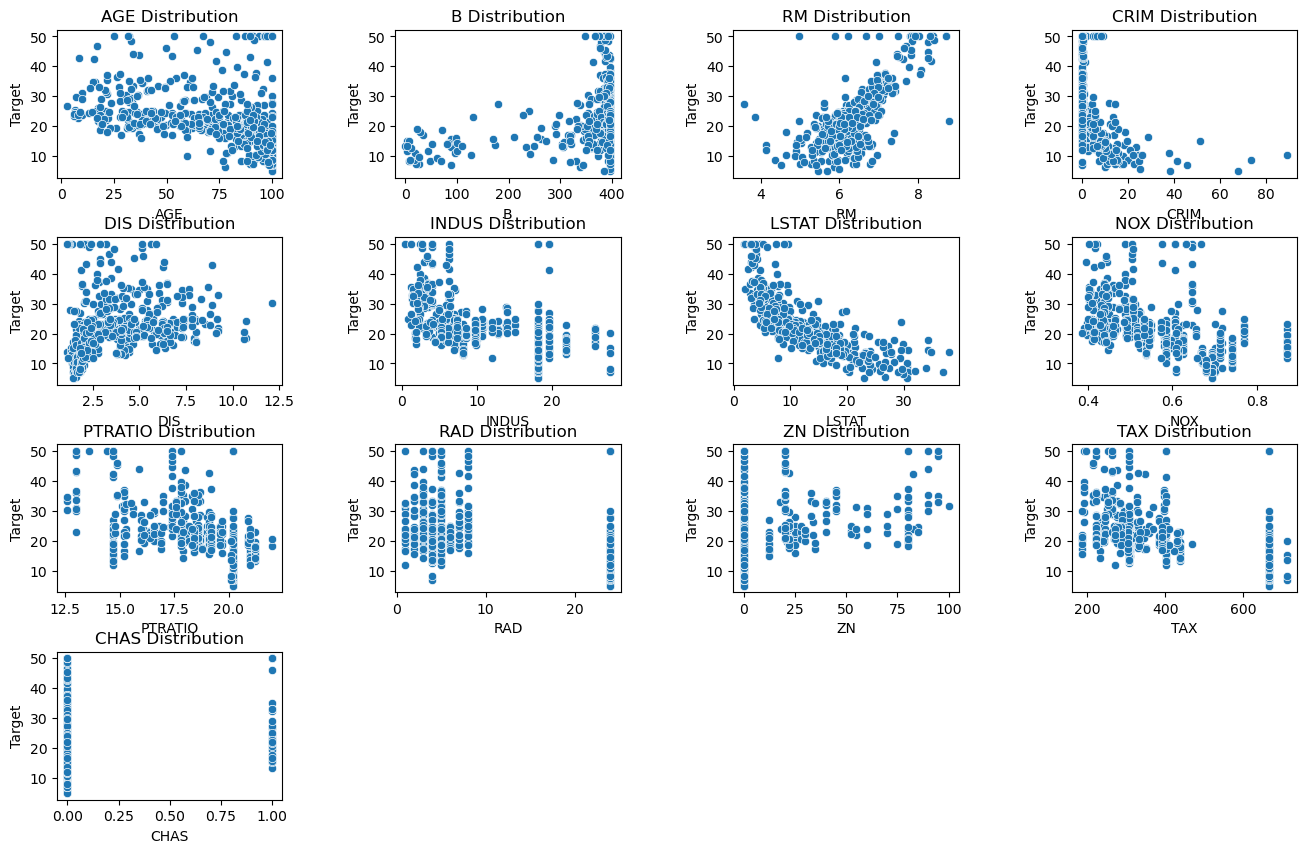

In [11]:
# y값과 변수들간의 관계
# 회귀를 선형적인 관계를 찾는 것
# 실제 Target과 변수들의 관계를 확인해보자

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
grid=gridspec.GridSpec(4,4)
plt.figure(figsize=(16, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.4)

bst_feature = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO','RAD', 'ZN', 'TAX', 'CHAS']

for idx, feature in enumerate(bst_feature):
    ax=plt.subplot(grid[idx])
    sns.scatterplot(x=feature,
                   y='Target',
                   data=boston, 
                   ax=ax)
    ax.set_title(f'{feature} Distribution')
    
    
#선형적인 관계 (y값과 다른 변수들의 관계를 시각화로 확인)
#눈으로 확인하는 것 외에 상관계수

In [12]:
boston.corr()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
AGE,1.000000,-0.273534,-0.240265,0.352734,-0.747881,0.644779,0.602339,0.731470,0.261515,0.456022,-0.569537,0.506456,0.086518,-0.376955
B,-0.273534,1.000000,0.128069,-0.385064,0.291512,-0.356977,-0.366087,-0.380051,-0.177383,-0.444413,0.175520,-0.441808,0.048788,0.333461
RM,-0.240265,0.128069,1.000000,-0.219247,0.205246,-0.391676,-0.613808,-0.302188,-0.355501,-0.209847,0.311991,-0.292048,0.091251,0.695360
CRIM,0.352734,-0.385064,-0.219247,1.000000,-0.379670,0.406583,0.455621,0.420972,0.289946,0.625505,-0.200469,0.582764,-0.055892,-0.388305
DIS,-0.747881,0.291512,0.205246,-0.379670,1.000000,-0.708027,-0.496996,-0.769230,-0.232471,-0.494588,0.664408,-0.534432,-0.099176,0.249929
INDUS,0.644779,-0.356977,-0.391676,0.406583,-0.708027,1.000000,0.603800,0.763651,0.383248,0.595129,-0.533828,0.720760,0.062938,-0.483725
LSTAT,0.602339,-0.366087,-0.613808,0.455621,-0.496996,0.603800,1.000000,0.590879,0.374044,0.488676,-0.412995,0.543993,-0.053929,-0.737663
NOX,0.731470,-0.380051,-0.302188,0.420972,-0.769230,0.763651,0.590879,1.000000,0.188933,0.611441,-0.516604,0.668023,0.091203,-0.427321
PTRATIO,0.261515,-0.177383,-0.355501,0.289946,-0.232471,0.383248,0.374044,0.188933,1.000000,0.464741,-0.391679,0.460853,-0.121515,-0.507787
RAD,0.456022,-0.444413,-0.209847,0.625505,-0.494588,0.595129,0.488676,0.611441,0.464741,1.000000,-0.311948,0.910228,-0.007368,-0.381626


<AxesSubplot:>

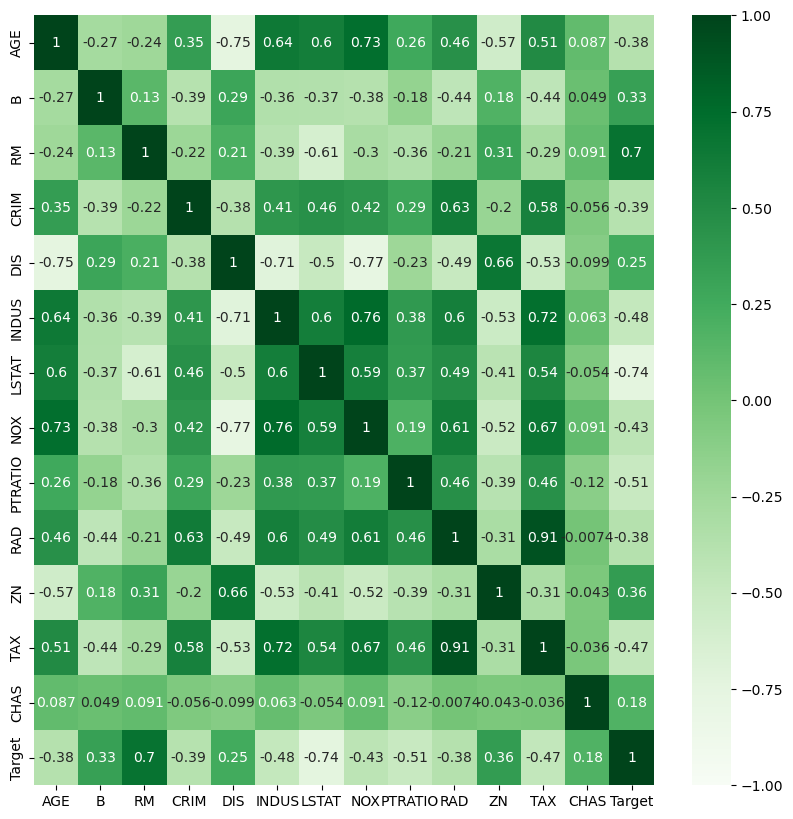

In [13]:
#heatmap으로 확인하기
import seaborn as sb
plt.rcParams['figure.figsize']=(10,10)
sb.heatmap(boston.corr(),
          annot=True,
          cmap='Greens',
          vmin=-1, vmax=1)
#각 변수들 간의 관계와 y값과의 관계를 확인해서 최적의 변수를 선택하기 위한 작업 시행

In [14]:
import statsmodels.api as sm
model=sm.OLS.from_formula('Target~'+'+'.join(bst_feature), data=boston)
res1=model.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          6.72e-135
Time:                        18:56:49   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
B              0.0093      0.003      3.467      0.001       0.004       0.015
RM             3.8099      0.418      9.116      0.000       2.989       4.631
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#p-value 높은 변수 ㄴㄴ
bst_feature1=['B', 'RM', 'CRIM', 'DIS', 'LSTAT', 'NOX', 'PTRATIO','RAD', 'ZN', 'TAX', 'CHAS']
model=sm.OLS.from_formula('Target~'+'+'.join(bst_feature1), data=boston)
res1=model.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     128.2
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          5.54e-137
Time:                        18:56:50   Log-Likelihood:                -1498.9
No. Observations:                 506   AIC:                             3022.
Df Residuals:                     494   BIC:                             3072.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.3411      5.067      7.171      0.000      26.385      46.298
B              0.0093      0.003      3.475      0.001       0.004       0.015
RM             3.8016      0.406      9.356      0.000       3.003       4.600
CRIM          -0.1084      0.033     -3.307      0.001      -0.173      -0.044
DIS           -1.4927      0.186     -8.037      0.000      -1.858      -1.128
LSTAT         -0.5226      0.047    -11.019      0.000      -0.616      -0.429
NOX          -17.3760      3.535     -4.915      0.000     -24.322     -10.430
PTRATIO       -0.9465      0.129     -7.334      0.000      -1.200      -0.693
RAD            0.2996      0.063      4.726      0.000       0.175       0.424
ZN             0.0458      0.014      3.390      0.001       0.019       0.072
TAX           -0.0118      0.003     -3.493      0.001      -0.018      -0.005
CHAS           2.7187      0.854      3.183      0.002       1.040       4.397
==============================================================================
Omnibus:                      178.430   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              787.785
Skew:                           1.523   Prob(JB):                    8.60e-172
Kurtosis:                       8.300   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#유의미하지 않는 변수 제거했을 때 값들이 변하는 것 확인

#그럼 선형회귀로 돌렸을 떄 

#단순선형회귀로만
bst_feature2= ['RM']
model=sm.OLS.from_formula('Target~'+'+'.join(bst_feature2), data=boston)
res1=model.fit()
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 02 Jul 2023   Prob (F-statistic):           2.49e-74
Time:                        18:56:50   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
bst_feature3= ['RM', 'LSTAT']
model=sm.OLS.from_formula('Target~'+'+'.join(bst_feature3), data=boston)
res1=model.fit()
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          7.01e-112
Time:                        18:56:51   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 단순선형회귀보다 다중회귀를 통한 설명 가능한 변수를 추가하는 것이 실제 R2 더 높아지고 회귀식에 대한 설명도 높아짐

# 꼭 알아야하는거!!!
# 1. 선형성 - 비선형회귀는 분석하기 어렵고 선형성이 중요함, 예측하고자하는 종속변수와 독립변수 간의 선형성 만족하는 특성 의미
## 만약 변수 중 선형성 만족하지 못하는 경우 (y와 관계가 애매함 -> 바꿔줘야)
### 1) 선형적이지 못하면 빼고 다른거 찾기
### 2) 로그나 지수로 변수변환(스케일링)
### 3) 선형적인 변수들만 가지고 회귀식을 만들고 추가적으로 비선형적인 것들을 더하는 식

# 2. 독립성
### 1) 다중회귀분석은 기본적으로 기본 가정이 독립변수 x 간에 상관관계가 없이 독립성 만족
### 2) 다중공선성 확인하고 이걸 통해 변수 제거하는 식으로 회귀식 만듦

# 예측값과 잔차에 대한 등분산성, 정규성 (qqplot)
# 3. 등분산성
# 4. 정규성

## 다중공선성을 체크하여 변수를 확인해보자
- 독립변수들간에 강한 상관관계가 나타나면, 회귀 분석의 전제가정인 독립변수 간에 상관관계 높으면 안된다는 조건 위배

- 다중공선성이 높은 경우
- 1. 변수 선택 제거
- 2. pca 의존적인 성분 삭제
- 3. 정규화

In [18]:
boston_spl=boston.loc[:,bst_feature]


In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
vif=pd.DataFrame()
vif['VIF factor']=[variance_inflation_factor(boston_spl, i) for i in range(boston_spl.shape[1])]
vif['features']=boston_spl.columns
vif=vif.sort_values('VIF factor').reset_index(drop=True)
vif

,VIF factor,features
0,1.152952,CHAS
1,2.100373,CRIM
2,2.844013,ZN
3,11.102025,LSTAT
4,14.485758,INDUS
5,14.699652,DIS
6,15.167725,RAD
7,20.104943,B
8,21.386850,AGE
9,61.227274,TAX


- vif 값 계수가 높다
- 10 이하인 값으로 맞춰주고 대부분 10 이상은 다중공선성이 높다고 본다
- 변수를 제거하게되면 값 자체도 변경됨

In [21]:
bst_feature_vif1=['B', 'RM', 'CRIM', 'DIS', 'LSTAT', 'NOX','RAD', 'ZN', 'TAX', 'CHAS']
boston_spl=boston.loc[:,bst_feature_vif1]

vif=pd.DataFrame()
vif['VIF factor']=[variance_inflation_factor(boston_spl, i) for i in range(boston_spl.shape[1])]
vif['features']=boston_spl.columns
vif=vif.sort_values('VIF factor').reset_index(drop=True)
vif

,VIF factor,features
0,1.130217,CHAS
1,2.096229,CRIM
2,2.330543,ZN
3,8.719382,LSTAT
4,10.005240,DIS
5,13.978236,RAD
6,18.556393,B
7,46.293286,TAX
8,55.332168,RM
9,62.872073,NOX


In [22]:
bst_feature_vif1=['B', 'RM', 'CRIM', 'DIS', 'LSTAT', 'NOX','RAD', 'ZN', 'TAX', 'CHAS']
boston_spl=boston.loc[:,bst_feature_vif1]

vif=pd.DataFrame()
vif['VIF factor']=[variance_inflation_factor(boston_spl, i) for i in range(boston_spl.shape[1])]
vif['features']=boston_spl.columns
vif=vif.sort_values('VIF factor').reset_index(drop=True)
vif

#반복문으로 돌려보면서 하는게 베스트

,VIF factor,features
0,1.130217,CHAS
1,2.096229,CRIM
2,2.330543,ZN
3,8.719382,LSTAT
4,10.005240,DIS
5,13.978236,RAD
6,18.556393,B
7,46.293286,TAX
8,55.332168,RM
9,62.872073,NOX


In [23]:
bst_feature_vif1=[ 'CRIM', 'DIS', 'LSTAT', 'ZN', 'CHAS']
boston_spl=boston.loc[:,bst_feature_vif1]

vif=pd.DataFrame()
vif['VIF factor']=[variance_inflation_factor(boston_spl, i) for i in range(boston_spl.shape[1])]
vif['features']=boston_spl.columns
vif=vif.sort_values('VIF factor').reset_index(drop=True)
vif


,VIF factor,features
0,1.051555,CHAS
1,1.567711,CRIM
2,2.232598,ZN
3,3.088560,LSTAT
4,3.916175,DIS


In [24]:
boston_spl=boston.loc[:,bst_feature_vif1]
boston_spl['Target']=boston['Target']

In [25]:
# 다중공선성이 높다고 높은 변수들만 삭제해버리면 기존 컬럼에 대한 도메인이 없어지고 수치로만 해석하는 상황 발생
# 방의 개수랑 집값이랑 당연히 관계 높다고 생각하는데 무작정 vif 수치만 보고 제거하면 중요한 변수 놓칠 수 있음
# 꼭 수치만 보고 작업하는게 아니라 관계와 어떤 변수는 중요하다고 판단되면 가지고 있고, 다른 변수를 삭제하면서 vif 조정

model=sm.OLS.from_formula('Target~'+'+'.join(bst_feature_vif1), data=boston_spl)
res1=model.fit()
res1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     159.8
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          3.25e-101
Time:                        18:57:10   Log-Likelihood:                -1598.7
No. Observations:                 506   AIC:                             3209.
Df Residuals:                     500   BIC:                             3235.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     38.6749      0.982     39.382      0.000      36.745      40.604
CRIM          -0.1260      0.034     -3.668      0.000      -0.194      -0.059
DIS           -1.3574      0.178     -7.617      0.000      -1.708      -1.007
LSTAT         -0.9414      0.044    -21.193      0.000      -1.029      -0.854
ZN             0.0970      0.015      6.520      0.000       0.068       0.126
CHAS           3.9447      1.020      3.869      0.000       1.942       5.948
==============================================================================
Omnibus:                      114.340   Durbin-Watson:                   1.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.265
Skew:                           1.252   Prob(JB):                     3.30e-49
Kurtosis:                       5.078   Cond. No.                         115.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
# 스케일링을 통한 회귀식 변화


In [27]:
boston_1=boston.copy()

In [28]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler.fit(boston_1)
boston_scl=scaler.transform(boston_1)

In [29]:
boston_scl=pd.DataFrame(boston_scl, columns=boston_1.columns)

In [30]:
bst_sclcol=['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS']

In [31]:
boston_scl_1=boston_scl.loc[:,bst_sclcol]

In [32]:
boston_scl.columns

Index(['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS', 'Target'],
      dtype='object')

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF factor']=[variance_inflation_factor(boston_scl_1, i) for i in range(boston_scl_1.shape[1])]
vif['features']=boston_scl_1.columns
vif=vif.sort_values('VIF factor').reset_index(drop=True)
vif


,VIF factor,features
0,1.073995,CHAS
1,1.348521,B
2,1.792192,CRIM
3,1.799084,PTRATIO
4,1.933744,RM
5,2.298758,ZN
6,2.941491,LSTAT
7,3.100826,AGE
8,3.955945,DIS
9,3.991596,INDUS


In [34]:
model4=sm.OLS.from_formula('Target~'+'+'.join(bst_sclcol),data=boston_scl)
res4 = model4.fit()
res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 02 Jul 2023   Prob (F-statistic):          6.72e-135
Time:                        18:57:17   Log-Likelihood:                -376.55
No. Observations:                 506   AIC:                             781.1
Df Residuals:                     492   BIC:                             840.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5.178e-16      0.023  -2.26e-14      1.000      -0.045       0.045
AGE            0.0021      0.040      0.052      0.958      -0.077       0.082
B              0.0924      0.027      3.467      0.001       0.040       0.145
RM             0.2911      0.032      9.116      0.000       0.228       0.354
CRIM          -0.1010      0.031     -3.287      0.001      -0.161      -0.041
DIS           -0.3378      0.046     -7.398      0.000      -0.428      -0.248
INDUS          0.0153      0.046      0.334      0.738      -0.075       0.105
LSTAT         -0.4074      0.039    -10.347      0.000      -0.485      -0.330
NOX           -0.2238      0.048     -4.651      0.000      -0.318      -0.129
PTRATIO       -0.2243      0.031     -7.283      0.000      -0.285      -0.164
RAD            0.2897      0.063      4.613      0.000       0.166       0.413
ZN             0.1177      0.035      3.382      0.001       0.049       0.186
TAX           -0.2260      0.069     -3.280      0.001      -0.361      -0.091
CHAS           0.0742      0.024      3.118      0.002       0.027       0.121
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                         9.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
boston_scl_1['Target']=boston_scl['Target']

In [36]:
# 스케일링도 변수마다 다 다르게 진행
# 변수에 대한 분포를 보고 어떤 스케일링을 할지 나눠서 생각

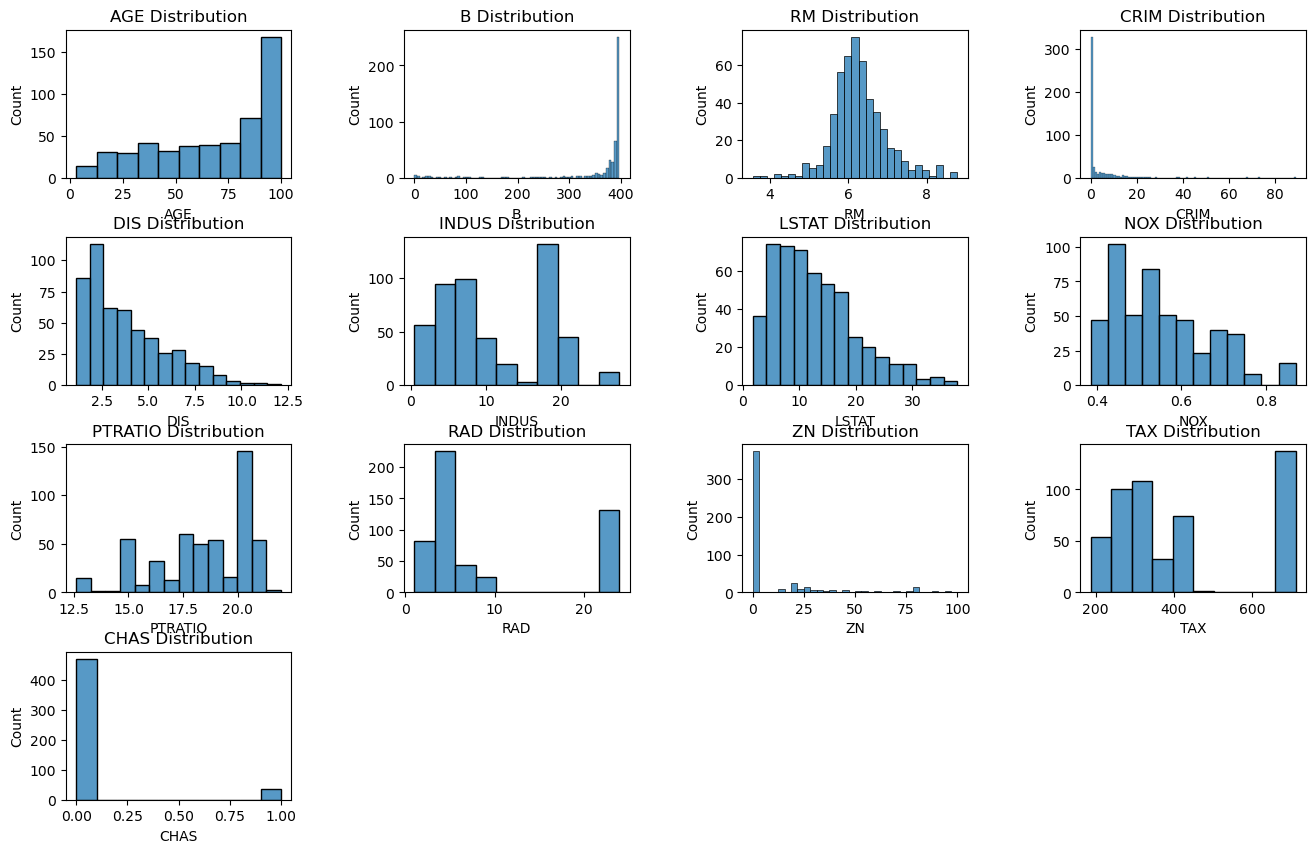

In [37]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
grid=gridspec.GridSpec(4,4)
plt.figure(figsize=(16, 10))
plt.subplots_adjust(wspace=0.5, hspace=0.4)

bst_feature = ['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO','RAD', 'ZN', 'TAX', 'CHAS']

for idx, feature in enumerate(bst_feature):
    ax=plt.subplot(grid[idx])
    sns.histplot(x=boston[feature],
               ax=ax)
    ax.set_title(f'{feature} Distribution')


In [38]:
boston.columns

Index(['AGE', 'B', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO',
       'RAD', 'ZN', 'TAX', 'CHAS', 'Target'],
      dtype='object')

In [39]:
import numpy as np

In [40]:
boston_lg1=np.log1p(boston[['B', 'CRIM', 'ZN', 'CHAS']])
scaler.fit(boston[[ 'RM', 'DIS','LSTAT', 'NOX', 'PTRATIO','RAD', 'TAX' ]])
boston_scl=scaler.transform(boston[[ 'RM', 'DIS','LSTAT', 'NOX', 'PTRATIO','RAD', 'TAX' ]])

In [66]:
boston_tar=np.log1p(boston['Target'])


In [41]:
boston_sc1=pd.DataFrame(boston_scl, columns=[ 'RM', 'DIS','LSTAT', 'NOX', 'PTRATIO','RAD', 'TAX' ])

In [42]:
boston_sc1.columns

Index(['RM', 'DIS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD', 'TAX'], dtype='object')

In [43]:
boston_fin=pd.concat([boston_lg1, boston_sc1], axis=1)

In [44]:
boston_fin

,B,CRIM,ZN,CHAS,RM,DIS,LSTAT,NOX,PTRATIO,RAD,TAX
0,5.986201,0.006300,2.944439,0.0,0.413672,0.140214,-1.075562,-0.144217,-1.459000,-0.982843,-0.666608
1,5.986201,0.026944,0.000000,0.0,0.194274,0.557160,-0.492439,-0.740262,-0.303094,-0.867883,-0.987329
2,5.975919,0.026924,0.000000,0.0,1.282714,0.557160,-1.208727,-0.740262,-0.303094,-0.867883,-0.987329
3,5.980479,0.031857,0.000000,0.0,1.016303,1.077737,-1.361517,-0.835284,0.113032,-0.752922,-1.106115
4,5.986201,0.066770,0.000000,0.0,1.228577,1.077737,-1.026501,-0.835284,0.113032,-0.752922,-1.106115
...,...,...,...,...,...,...,...,...,...,...,...
501,5.973784,0.060747,0.000000,0.0,0.439316,-0.625796,-0.418147,0.158124,1.176466,-0.982843,-0.803212
502,5.986201,0.044275,0.000000,0.0,-0.234548,-0.716639,-0.500850,0.158124,1.176466,-0.982843,-0.803212
503,5.986201,0.058986,0.000000,0.0,0.984960,-0.773684,-0.983048,0.158124,1.176466,-0.982843,-0.803212
504,5.977492,0.103991,0.000000,0.0,0.725672,-0.668437,-0.865302,0.158124,1.176466,-0.982843,-0.803212


In [ ]:
# 과제!
# knn회귀 , 다중회귀
# 이 두가지를 모델링을 비교, 예측값 비교
# train test 나누기
# 지표 rmse, mape 외 지표 ㄱㄴ
# 예측값이 나오면 단차 비교가 가능 
# 잔차에 대한 정규성, 등분산성, 독립성 등 체크해서 정리하는 코드 + 주석
# 본인만의 로직으로 변수를 선택 후에 knn, 다중회귀 진행
# 예측 -> 예측값을 가지고 잔차에 대한 검정, rmse dㅖ측값 비교

In [ ]:
# 발표 예정, 랜덤 지정